In [1]:
import pandas as pd

In [2]:
file = "50_Startups.xlsx"
df = pd.read_excel(file)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
df['State'].replace(to_replace = ['California','New York', 'Florida'], value=[1,2,3], inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.144221,0.972900
Administration,0.241955,1.000000,-0.032154,0.015055,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.216639,0.747766
State,0.144221,0.015055,0.216639,1.000000,0.151829
Profit,0.972900,0.200717,0.747766,0.151829,1.000000


In [9]:
x = df.drop('Profit',axis=1)

In [10]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,1
2,153441.51,101145.55,407934.54,3
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,3


In [11]:
y = df.Profit

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [14]:
from sklearn import preprocessing
normal = preprocessing.StandardScaler().fit(x_train)

In [15]:
x_train = normal.transform(x_train)
x_test = normal.transform(x_test)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lr.fit(x_train, y_train)
yhat = lr.predict(x_test)
yhat[:5]

array([102038.13256746, 133832.54828587, 133252.51690417,  73286.99171203,
       179047.28999344])

In [19]:
from sklearn import metrics

In [20]:
metrics.r2_score(y_test, yhat)

0.9420468609665684

In [21]:
import seaborn as sns

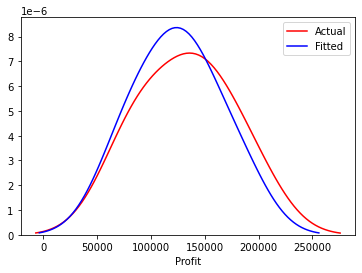

In [22]:
ax1 = sns.distplot(y_test, hist=False, color='red', label='Actual')
ax2 = sns.distplot(yhat, hist=False, color='blue', label='Fitted', ax=ax1)